## Notebook under construction 

## 1 dimensional gradient descent

* Displays the loss function for linear regression with one parameters for the blood pressure data.
* Demonstrates gradient descent (assumnes the formula for the gradient as given in the book)
* Plots the successive updates of the parameter 


<a href="https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/mse_loss_gradient_descent_1d.ipynb" target="_blank"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="open in colab">
</a>
| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/mse_loss_gradient_descent_1d.ipynb)

##3.1         “Hello world” in curve fitting


#### Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Blood Pressure data 


In [0]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32) 

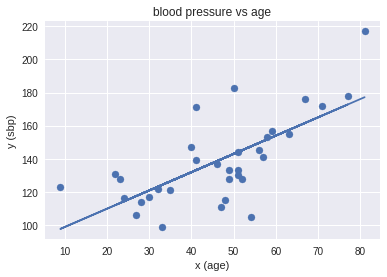

intercept =  87.67143 solpe =  1.1050216


In [0]:
plt.scatter(x=x,y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")

from sklearn.linear_model import LinearRegression
model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)
plt.show()
print("intercept = ",res.intercept_,"solpe = ", res.coef_[0],)


####  MSE for all data points

In [0]:
a = 1                            
b = 100                          
y_hat = a*x + b                  
r = (y - y_hat)                  
MSE = np.sum(np.square(r)) / len(y)     
MSE


408.1515151515151

#### Minimize the  MSE by trying different values for the slope a and the intercept 
Exercise : try to find better values for a and b, yielding a lower MSE.  
Remember that a was 1, b was 100 and the MSE was 408.15



In [0]:

a =0.9                            # try a diffrent value for a here that minimizes the MSE 
b =101                            # try a diffrent value for b here that minimizes the MSE


y_hat = a*x + b                  
r = (y - y_hat)                  
MSE = np.sum(np.square(r)) / len(y)     
MSE

375.356415719697

#### Using the closed form solution to minimize the MSE with a and b
TODO: add formula

In [0]:
a_hat = np.sum((x-np.mean(x))*((y-np.mean(y)))) / (np.sum(np.square(x-np.mean(x))))
b_hat = np.mean(y) - a_hat*np.mean(x)

a = a_hat                         
b = b_hat                       
y_hat = a*x + b                  
r = (y - y_hat)                  
MSE = np.sum(r**2) / len(y)      

print("slope : a_hat = " ,a_hat)
print("intercept : b_hat = " ,b_hat)
print("minimal MSE = ", MSE)

slope : a_hat =  1.1050217
intercept : b_hat =  87.67143
minimal MSE =  349.20090553977275


##3.2         Gradient descent method 1D


In [0]:
b = 87.6
a = np.arange(-1, 2, 0.02)
MSE=np.zeros(len(a))
for i in range(0,len(a)):
  MSE[i] =  np.mean(np.square(y-(a[i] * x + b)))
#

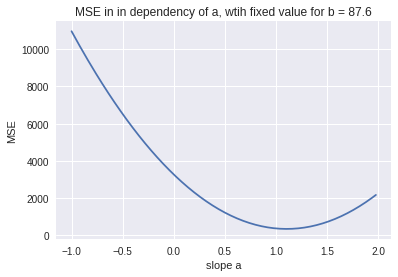

In [0]:
plt.plot(a,MSE)
plt.title("MSE in in dependency of a, wtih fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.show()

#### Change the learning rate and study how the slope a gets updated
Exercise : try to find a better learning rate eta that reaches the optimal value for a.
Try larger and smaller values


In [0]:
a_ = -0.5
a_history = -0.5
eta = 0.0003
for i in range(0,5):
  grad_a = -2/len(y)*np.sum((y -a_ * x - b) *x) 
  a_ = a_ - eta*grad_a
  a_history =np.append(a_history,a_) 

In [0]:
print(a_history)

[-0.5         1.80608736  0.80163942  1.23914048  1.04858093  1.1315818 ]


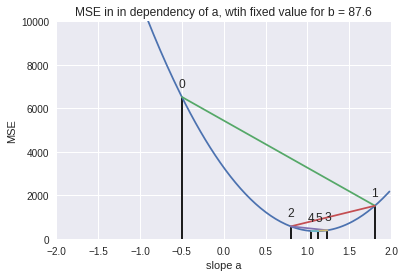

In [0]:
plt.plot(a,MSE)
plt.title("MSE in in dependency of a, wtih fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.ylim((0,10000))
plt.xlim((-2,2))

for i in range(0,len(a_history)):
  plt.vlines(x=a_history[i],ymin=0,ymax= np.mean(np.square(y-(a_history[i] * x + b))))
  plt.text(x=a_history[i],y= np.mean(np.square(y-(a_history[i] * x + b)))+600,s= i,horizontalalignment='center',verticalalignment='center',fontsize=12)
for i in range(0,len(a_history)-1):
  plt.plot([a_history[i], a_history[i+1]],[np.mean(np.square(y-(a_history[i] * x + b))), np.mean(np.square(y-(a_history[i+1] * x + b)))])
plt.show()